# Chapter 4 - Classification
This chapter will discuss qualitative (categorical) variables (classification problems). Classification problems can be thought of as regression problems since most of the models return a probability of being in a certain class. Since probabilities take on real values the problem can also be called regression - as in logistic regression - a machine learning technique that is used for classification but returns probabilities as real values.

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [204]:
default = pd.read_csv("data/default.csv")

In [169]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


c:\Users\user\anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


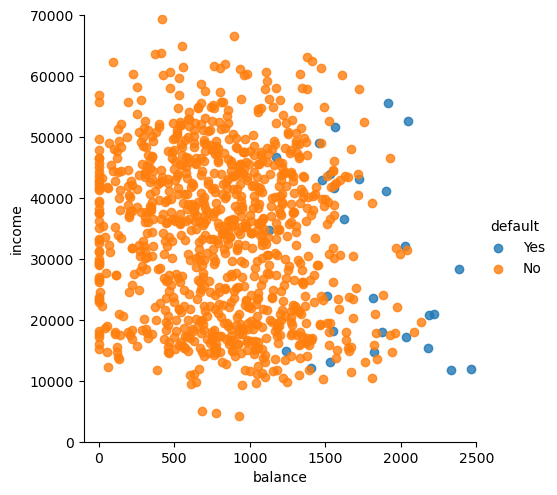

In [170]:
sns.lmplot(x='balance', y='income', data=default.sample(1000), hue='default', fit_reg=False)
plt.ylim([0,70000])
plt.xlim([-100,2500])
plt.show();

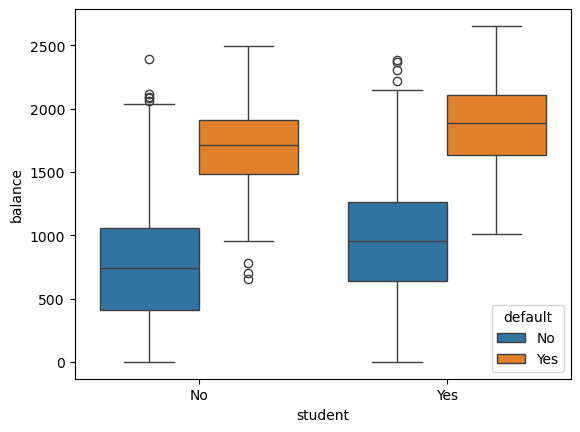

In [171]:
# evidence tha
sns.boxplot(x='student', y='balance', data=default, hue='default')
plt.show()

# Why not linear regression
When your response variable is a category (like "Yes" or "No", or "Red", "Green", "Blue"), you can use numbers to represent them (like 0, 1, 2), but it usually doesn't make sense to do so in a regular linear regression.

The numbers you assign to categories don't have a natural order (e.g., is "Red" < "Green"?).

In a two-category case (like "Yes" or "No"), you might label them as 0 and 1, but using linear regression on that can give you predictions less than 0 or more than 1, which are not valid probabilities.

That’s why use logistic regression instead. It’s designed to handle categorical outcomes and keeps the predicted values between 0 and 1, like real probabilities.

In [172]:
import statsmodels.formula.api as smf
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [205]:
# make column for Yes defaults
default['Yes'] = (default['default'] == 'Yes').astype(int)

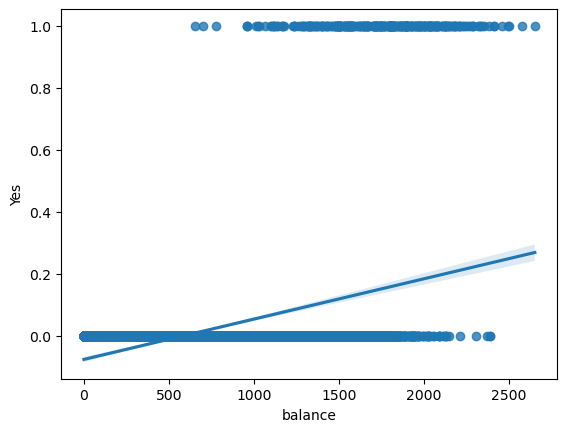

In [174]:
# linear regression model for default
# not ideal and could be made better by simply making all probabilites < 0 equal to 0
# and all probabilites > 1 equal to 1
sns.regplot(x='balance', y='Yes', data=default)
plt.show()

# Logistic regression

In logistic regression, we want to predict something that has two possible outcomes — like win or lose, yes or no, pass or fail.
But there's a problem: regular linear regression can give predictions outside the range of 0 to 1, which doesn’t make sense if we’re talking about probabilities.

**So what do we do?**
>We use a special function called the logistic function (also known as the sigmoid function). It always gives results between 0 and 1, which is perfect for probabilities.

>The formula:
$$y = \frac{1}{1 + e^{-t}}$$ where $$t = \beta_0 + \beta_1X$$

>Here:
>- $𝑦$ the predicted probability
>- $\beta_0 + \beta_1X$ is the same kind of linear equation you'd use in regular regression
>- $𝑒$ is the base of natural logarithms

**How to understand the output**
>- The output $𝑦$ is a number between 0 and 1 — as the probability of an event happening.
>- For example, if $𝑦$=0.8, you’re predicting an 80% chance the event happens.

**Odds and log-odds**
>Instead of modeling probability directly, logistic regression models something called log-odds.
>- Odds = probability of the event / probability it doesn't happen.
So if there's an 80% chance of winning, the odds are:
$$0.8/0.2= 4$$
>- → "4 to 1 odds"
>- Log-odds is just taking the logarithm of the odds. Logistic regression says:
$$log{\frac{p(X)}{1 - p(X)}} = \beta_0 + \beta_1X$$
>>- When $𝑋$ increases by 1, the log-odds increase by $\beta_1$.
>>- The odds (not the log) increase by a factor of $𝑒^{\beta_1}$
>Example:
>>- If $\beta_1= 0.5$, then the odds multiply by $𝑒^{0.5}≈ 1.65$
>>- That means a 1-point increase in $𝑋$ increases the odds by about 65%

- Logistic regression helps us predict probabilities
- But it models log-odds using a straight line
- This makes sure predictions stay between 0 and 1, unlike regular regression

# Estimating coefficients through Maximum Likelihood
In linear regression, best-fitting line is found by minimizing the squared differences between what the model predicts and what actually happened. These differences are called residuals.

But in logistic regression, probabilities were perdicted, not exact number, so different method is used called maximum likelihood.

**Maximum likelihood** works by asking:
>- “Given the data we have, what values of the model parameters (like $\beta_0$ and $\beta_1$) make the observed outcomes most likely?”
>- For each data point, the model gives a probability.
>- We then multiply all those probabilities together.
>- The goal is to find the parameter values that make that overall product as large as possible.

**However**
>- When a lot of small probabilities is multiplied, the result becomes a very tiny number. This is called a numerical underflow (computers have trouble with very tiny numbers).
>- So instead of multiplying probabilities, we take the log of each one (which turns multiplication into addition). This is called the log likelihood.

1) Logistic regression finds the best-fitting model by choosing the parameter values that make the observed data most likely.
2) It does this using log likelihood to avoid math problems with really small numbers.

In [175]:
# Think about doing a maximum likelihood example with 4 coin tosses and 3 heads.
# Start with .5 then choose .6 and see the differences

In [176]:
results = smf.logit('Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


model found the best fit in 10 steps, and the final error (or loss) is around 0.0798.

In [177]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 May 2025   Pseudo R-squ.:                  0.4534
Time:                        23:00:21   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- Intercept = -10.65: When balance = 0, the log-odds of "Yes" is very low.
- balance = 0.0055: For each 1-unit increase in balance, the log-odds of "Yes" increase by 0.0055.
That means higher balance → higher chance of "Yes".
- Very small p-values (0.000): Both the intercept and balance are statistically significant.

Model quality:
- Pseudo R-squared = 0.4534: The model explains about 45% of the variation — good for logistic regression.
- Log-Likelihood improved: The model fits much better than a model with no predictors.
- LLR p-value < 0.000: The overall model is highly significant.
- Converged: True: The algorithm successfully found the best-fitting solution.

c:\Users\user\anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


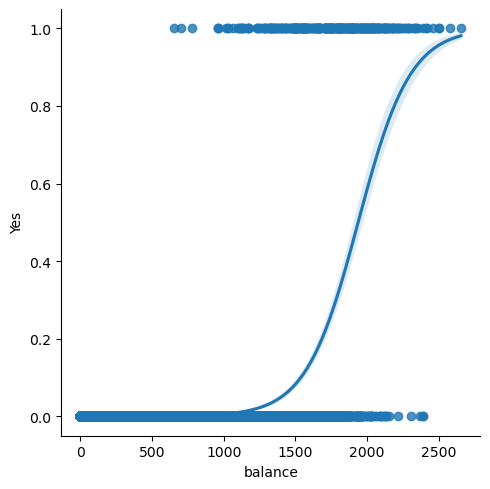

In [178]:
# Looks quite a bit different than the linear regression model
sns.lmplot(x='balance', y='Yes', data=default, logistic=True)
plt.show()

## Interpretation
For every one dollar increase in balance the log odds increases by .0555. The log odds when there is no balance is -10.6

In [179]:
# p / (1 - p) = 
odds = np.exp(-10.65)
odds

2.3700841597751968e-05

In [180]:
# (1 - p) / p = 1 / odds
one_over_odds = 1 / odds

In [181]:
# 1/p = one_over_odds + 1
one_over_p = one_over_odds + 1

In [182]:
# p = 1 / one_over_p

In [183]:
# since p is so close to 0, p / (1 - p) is nearly equivalent to p
p = 1 / one_over_p
p

2.370027988117268e-05

# Scikit-learn for easier prediction
http://scikit-learn.org/stable/

In [184]:
from sklearn.linear_model import LogisticRegression

In [206]:
# this actually uses regularization by default which will be covered in later chapters
lr = LogisticRegression()

In [207]:
X = np.column_stack((np.ones(len(default)), default['balance']))

In [187]:
X

array([[1.00000000e+00, 7.29526495e+02],
       [1.00000000e+00, 8.17180407e+02],
       [1.00000000e+00, 1.07354916e+03],
       ...,
       [1.00000000e+00, 8.45411989e+02],
       [1.00000000e+00, 1.56900905e+03],
       [1.00000000e+00, 2.00922183e+02]])

In [208]:
lr.fit(X, default['Yes'])

LogisticRegression()

In [189]:
# Model coefficients are different by B1 is very similar
lr.coef_

array([[-5.16481986,  0.00530575]])

In [190]:
# predict 1000 dollar balance default
lr.predict_proba([[1, 1000]]) # 99 percent chance no default

array([[0.99346413, 0.00653587]])

In [191]:
# predict 2000 dollar balance default
lr.predict_proba([[1, 2000]]) ## 55 percent chance default

array([[0.42999758, 0.57000242]])

In [192]:
# predict 3000 dollar balance default
lr.predict_proba([[1, 3000]]) ## >99 percent chance default

array([[0.00372998, 0.99627002]])

# Multiple Linear Regression
more than 1 predictor

In [209]:
results = smf.logit('Yes ~ balance + student', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [194]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 25 May 2025   Pseudo R-squ.:                  0.4619
Time:                        23:00:35   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Result Interpretation
1) Intercept = -10.75
- When balance = 0 and not a student, the chance of "Yes" is extremely low.
student[T.Yes] = -0.71
- Being a student decreases the odds of "Yes" (statistically significant).
2) balance = 0.0057
- Higher balance increases the odds of "Yes" — a strong and significant effect.

**Model fit**
- Pseudo R-squared = 0.4619 → The model explains about 46% of the variation (good).
- LLR p-value < 0.000 → The overall model is highly significant.
- converged: True → The model successfully found the best fit.

Higher balance increases the chance of "Yes", while being a student lowers it. The model fits well and the results are statistically solid.

In [210]:
default['student_yes'] = (default['student'] == 'Yes').astype(int)

In [211]:
X = np.column_stack((np.ones(len(default)), default['balance'], default['student_yes']))

In [197]:
X

array([[1.00000000e+00, 7.29526495e+02, 0.00000000e+00],
       [1.00000000e+00, 8.17180407e+02, 1.00000000e+00],
       [1.00000000e+00, 1.07354916e+03, 0.00000000e+00],
       ...,
       [1.00000000e+00, 8.45411989e+02, 0.00000000e+00],
       [1.00000000e+00, 1.56900905e+03, 0.00000000e+00],
       [1.00000000e+00, 2.00922183e+02, 1.00000000e+00]])

In [212]:
lr.fit(X, default['Yes'])

LogisticRegression()

In [199]:
lr.coef_

array([[-5.19067722,  0.00554579, -0.84302061]])

In [200]:
# predict 1000 dollar balance default
lr.predict_proba([[1, 2000, 1]]) # 99 percent chance no default

array([[0.5331531, 0.4668469]])

# Simpsons paradox
A phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.

Simple example:
- In two separate hospitals, Hospital A has a higher recovery rate than Hospital B.
- But when you combine the data from both hospitals, suddenly Hospital B looks better overall.
- This happens because of hidden factors (like patient severity) that affect the results.

**Simpson’s Paradox shows how combining data can sometimes hide or reverse what’s really going on in the individual groups.**

In [201]:
results = smf.logit('Yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 May 2025   Pseudo R-squ.:                0.004097
Time:                        23:00:35   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

The first model above with both balance and student show a negative relationship between student and default - meaning that being a student decreases the likelihood of defaulting. The second model shows the opposite, that being a student increases the chance at defaulting. This can be explained by the fact that students have more debt on average but compared to those with the same amount of debt they are less likely to default.

# Linear Discriminant Analysis
LDA is a method used to classify data into multiple categories (more than two classes).
- It assumes that each predictor (input variable) follows a normal (Gaussian) distribution.
- It calculates the average (mean) and spread (variance) for each predictor.
- It assumes that all classes share the same variance.
- It also figures out how common each class is in the data (this is called the prior probability).

For multiple predictors:
- It uses a multivariate Gaussian (a fancy version of the normal distribution for more than one variable).
- It also considers how the variables relate to each other (this is called the covariance matrix).

How does it classify?
- It uses Bayes' Rule to calculate the probability that a data point belongs to each class.
- Then it picks the class with the highest probability.

Don't confuse Linear Discriminant Analysis (LDA) with Latent Dirichlet Allocation. Both are totally different things.

### Example
**Goal**
We want to predict which class (e.g., spam vs. not spam) a new observation belongs to using Bayes’ Theorem.

**Suppose:**
- There are K classes (e.g., 3 different types of animals).
- We want to know: What’s the chance a data point with value $𝑋=𝑥$ belongs to class $𝑘$?

**Terms explained:**
- $𝜋_𝑘$ : The prior probability of class $𝑘$.
>- → How common is class $𝑘$ overall in the data?
- $𝑓_𝑘(𝑥)$ :The probability of seeing $𝑋=𝑥$ if we know the point is from class $𝑘$.
>- → This is called the likelihood.
- $𝑝_𝑘(𝑥)$ : The posterior probability, or
>- → “Given this input $𝑥$, what’s the chance it belongs to class $𝑘$?”

**Bayes theorem** states that
$$P(Y=k \, | \, X=x ) = \dfrac{\pi_k f_k(x)}{\sum_{l=1}^K{\pi_l f_l(x)}}$$

This just means:
>- The chance that a point with input $𝑥$ belongs to class $𝑘=$
(How common class $𝑘$ is) × (How likely $𝑥$ is in class $𝑘$) divided by
(Total of that same value for all classes)

**In practice:**
>- We can easily count to estimate $𝜋_𝑘$ (how frequent each class is).
>- But estimating $𝑓_𝑘(𝑥)$ (how likely a value is in a class) is hard.
So, we make assumptions (like using a normal distribution) to make it easier.

**In short:**
We use Bayes' Theorem to find out the chance a new data point belongs to each class. We multiply how common the class is by how likely the input is in that class, then compare it across all classes. Since it's hard to know exact probabilities, we assume the data follows a simple distribution to make calculations possible.

Here we will use $$p_k(x) = P(Y=k \, | \, X=x)$$ which is the posterior probability that an observation
$X = x$ belongs to the $k$ th class.

+ Estimating $\pi_k$ is easy if we have a random sample of $Y$ from the population.

+ Estimating $f_k(x)$ is challenging, hence we assume some simple forms for these densities.

### LDA for one predictor, $p=1$

+ Assume that $f_k(x)$ is normal/Gaussian,
$$f_k(x) = \frac{1}{\sqrt{2 \pi}\sigma_k} \exp \left( -\frac{1}{2 \sigma_k^2} (x - \mu_k)^2\right)$$
 where $\mu_k$ and $\sigma^2_k$ are the mean and variance for the $k$th class.

+ Assume for now, $\sigma^2_1 = \ldots = \sigma^2_K = \sigma^2$.

+ Hence, 
$$p_k(x) = \dfrac{\pi_k \frac{1}{\sqrt{2 \pi}\sigma} \exp \left( -\frac{1}{2 \sigma^2} (x - \mu_k)^2\right)}{\sum_{l=1}^K{\pi_l \frac{1}{\sqrt{2 \pi}\sigma} \exp \left( -\frac{1}{2 \sigma^2} (x - \mu_l)^2\right)}}$$

+ Taking the log and rearranging the terms, this is equivalent to assigning the observation to the class for which 
$$\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)$$
is largest.

+ If $K=2$ and $\pi_1 = \pi_2$, then the Bayes classifier assigns an observation to class 1 if $$2x(\mu_1 - \mu_2) > \mu_1^2 - \mu_2^2$$ and to class 2 if otherwise. The Bayes decision boundary is the points where $$x = \frac{\mu_1^2 - \mu_2^2}{2(\mu_1 - \mu_2)} = \frac{\mu_1 + \mu_2}{2}$$



#### Example
+ 2 classes
+ $\mu_1 = -1.25$, $\mu_2 = 1.25$ and $\sigma_1^2 = \sigma_2^2 = 1$.
+ Assume $\pi_1 = \pi_2 = 0.5$
+ Class 1: $x<0$
+ Class 2: $x>0$

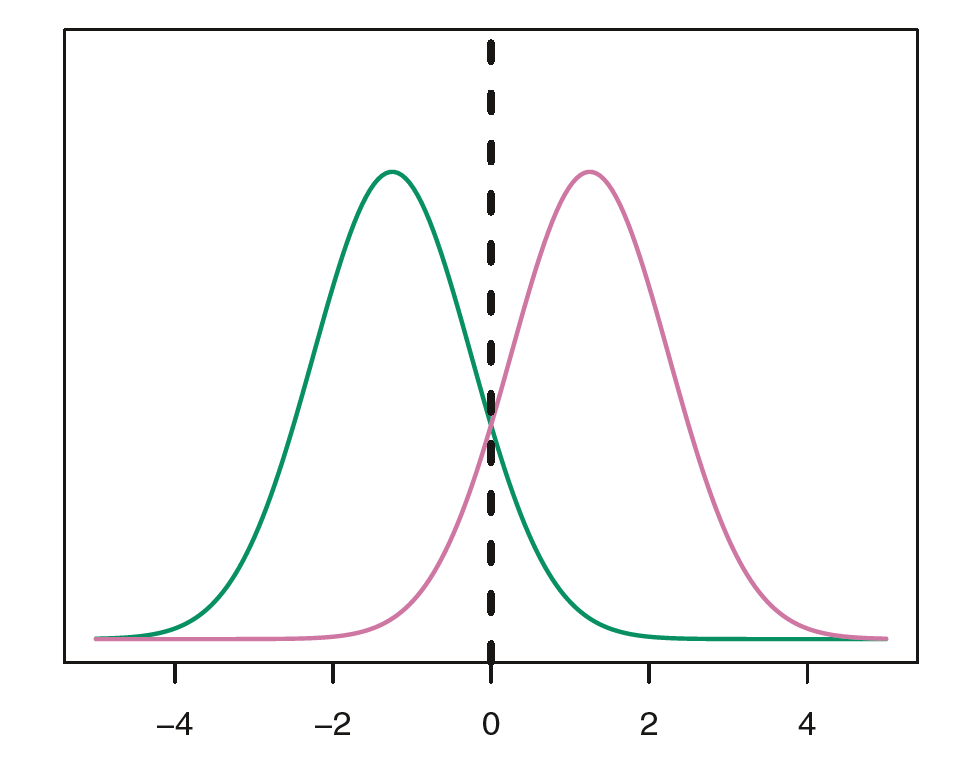

In [36]:
from IPython.display import Image
Image('images/p1.png', width =400)

+ Through LDA, the following estimates are used:
$$\begin{aligned}
    \hat{\mu}_k &= \frac{1}{n_k}\sum_{i:y_i = k}{x_i} \\
    \hat{\sigma}^2 &= \frac{1}{n-K}\sum_{k=1}^K{\sum_{i:y_i = k}{(x_i - \hat{\mu}_k)^2}}
\end{aligned}$$
+ $n$ - total number of training observations
+ $n_k$ - number of training observations in the $k$ th class
+ Without prior knowledge, LDA estimates of $\pi_k$ are
    $$\hat{\pi}_k = \frac{n_k}{n}$$
+ Hence, an observation is assign to the class for which the **discriminant function**
$$\hat{\delta}_k(x) = x \cdot \frac{\hat{\mu}_k}{\hat{\sigma}^2} - \frac{\hat{\mu}_k^2}{2\hat{\sigma}^2} + \log(\hat{\pi}_k)$$
is largest.

#### Example (cont.)
+ 20 observations were drawn from each of the two classes, and are shown as histograms.
+ Dashed vertical line - Bayes decision boundary 
+ Solid vertical line - LDA decision boundary 

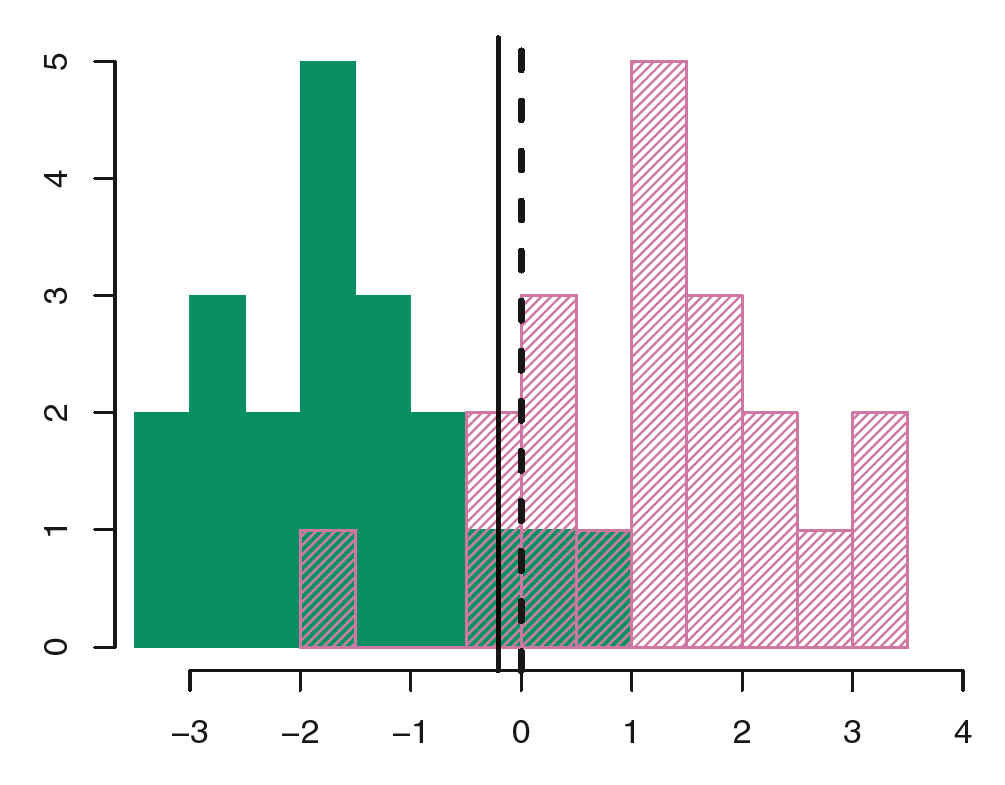

In [37]:
Image('images/p2.png', width =400)

### LDA for $p>1$
+ Assume $X = (X_1, X_2, \ldots, X_p)$ is drawn from a multivariate Gaussian distribution.
+ The density function is defined as 
$$f(x) = \frac{1}{(2\pi)^{p/2}|\mathbf{\Sigma}|^{1/2}} \exp \left( -\frac{1}{2}(x-\mu)^T \mathbf{\Sigma}^{-1} (x-\mu) \right)$$
 where $\mu_k$ is a class-specific mean vector and $\mathbf{\Sigma}$ is a covariance matrix that is common to all K classes.
+ The Bayes classifier assigns an observation $X = x$ to the class for which
$$\delta_k(x) = x^T \mathbf{\Sigma}^{-1} \mu_k - \frac{1}{2} \mu_k^T \mathbf{\Sigma}^{-1}\mu_k + \log{\pi_k}$$
is largest.

#### Example
+ 3 equally sized Gaussian classes, with class-specific mean vectors and a common covariance matrix.
+ Two predictors, $p=2$.
+ 20 observations from each class.

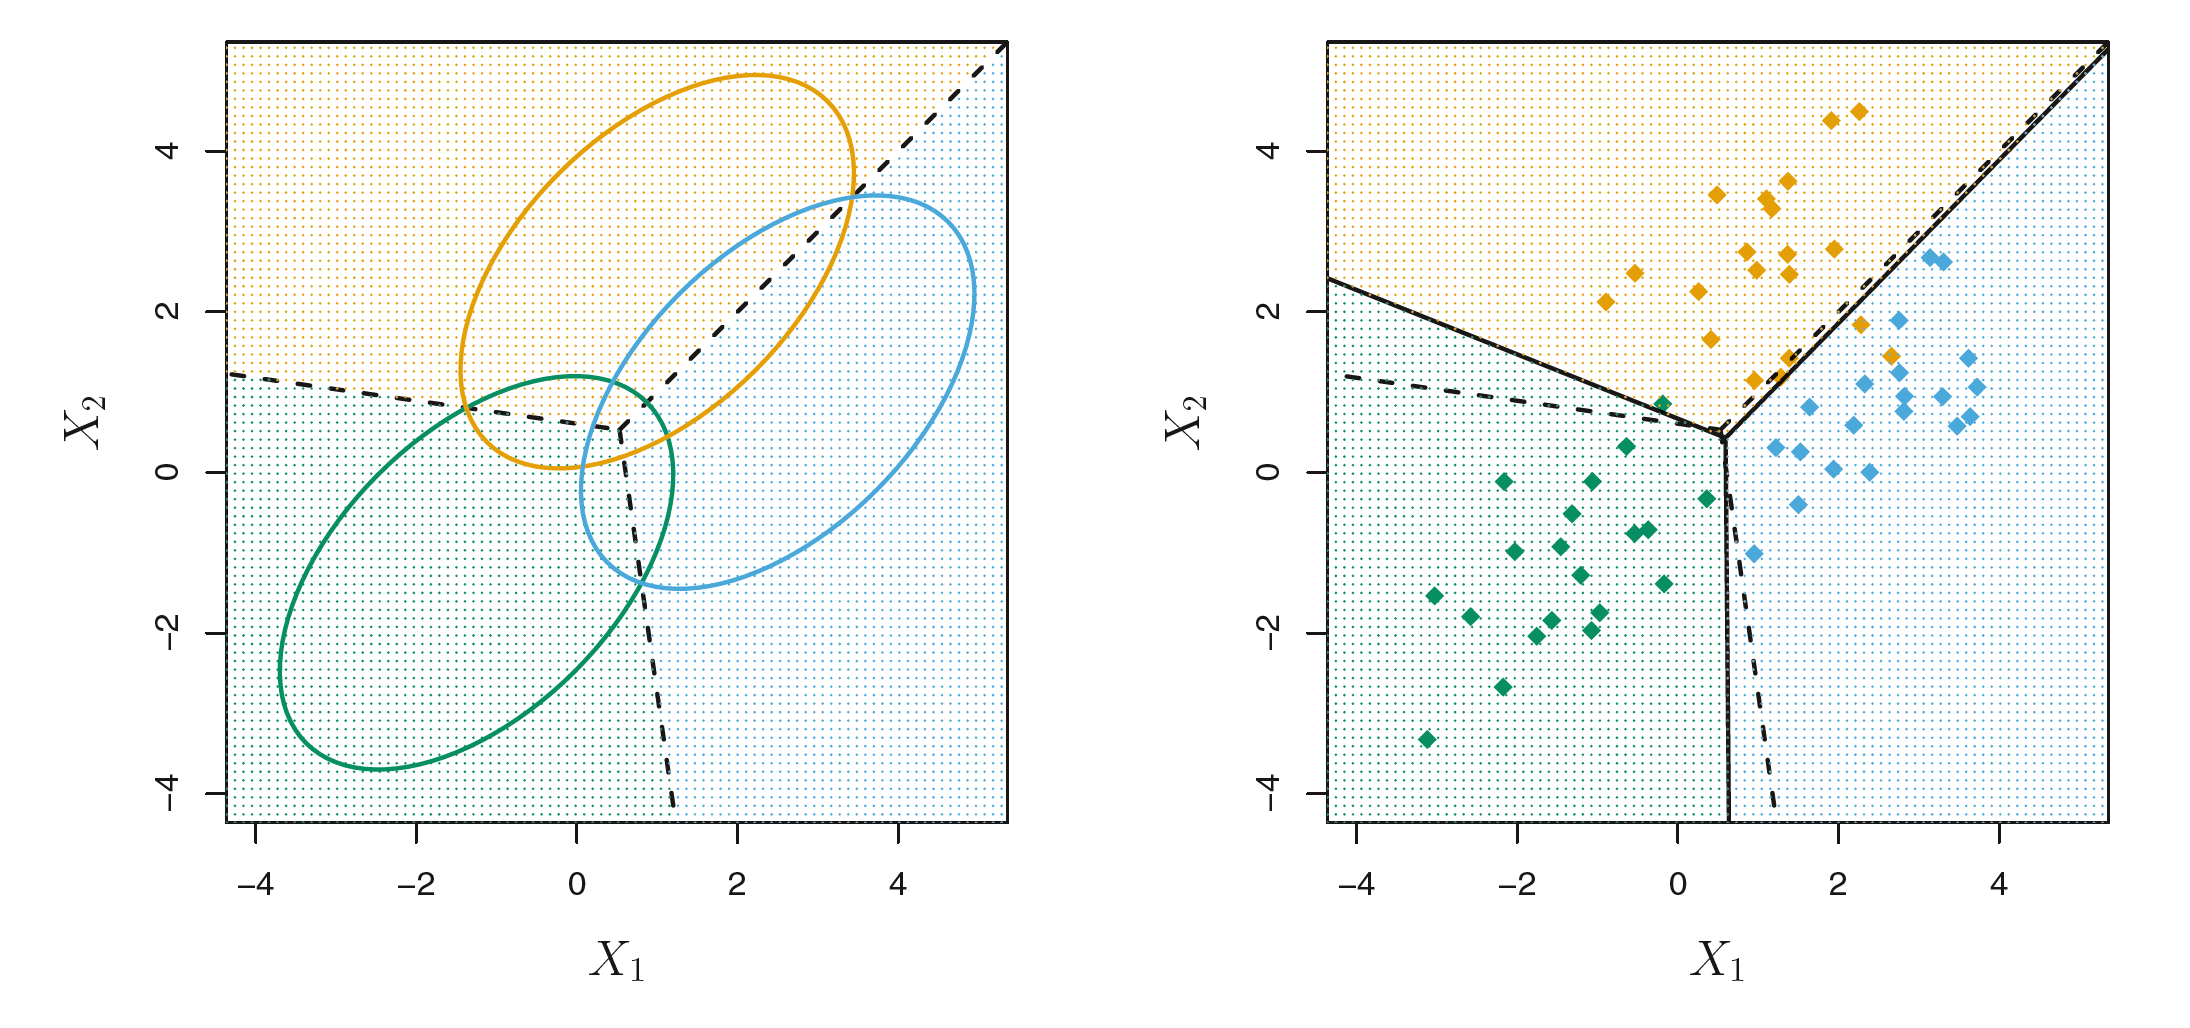

In [38]:
Image('images/p3.png', width =800)
# to decide the decision limit

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y, lda.predict(X))

array([[3, 0],
       [0, 3]], dtype=int64)

- 3 predicted for class 1
- 3 predicted for class 2

In [42]:
print(lda.predict([[0.8, 1]]))

[2]


- the point [0.8,1] is on the class 2 side of the decision boundary 

#### Example: Default Data

In [43]:
default = pd.read_csv("data/default.csv")

In [44]:
default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [45]:
default['Yes'] = (default['default'] == 'Yes').astype(int)
default['St'] = (default['student'] == 'Yes').astype(int)

In [46]:
X=default[['St', 'balance']].values
y=default['Yes'].values

In [47]:
X

array([[0.00000000e+00, 7.29526495e+02],
       [1.00000000e+00, 8.17180407e+02],
       [0.00000000e+00, 1.07354916e+03],
       ...,
       [0.00000000e+00, 8.45411989e+02],
       [0.00000000e+00, 1.56900905e+03],
       [1.00000000e+00, 2.00922183e+02]])

In [48]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
lda.fit(X,y)

LinearDiscriminantAnalysis()

In [50]:
confusion_matrix(y,lda.predict(X))

array([[9644,   23],
       [ 252,   81]], dtype=int64)

In [51]:
confusion_matrix(lda.predict(X),y)

array([[9644,  252],
       [  23,   81]], dtype=int64)

always use confusion_matrix(y, lda.predict(X)) **the correct way**

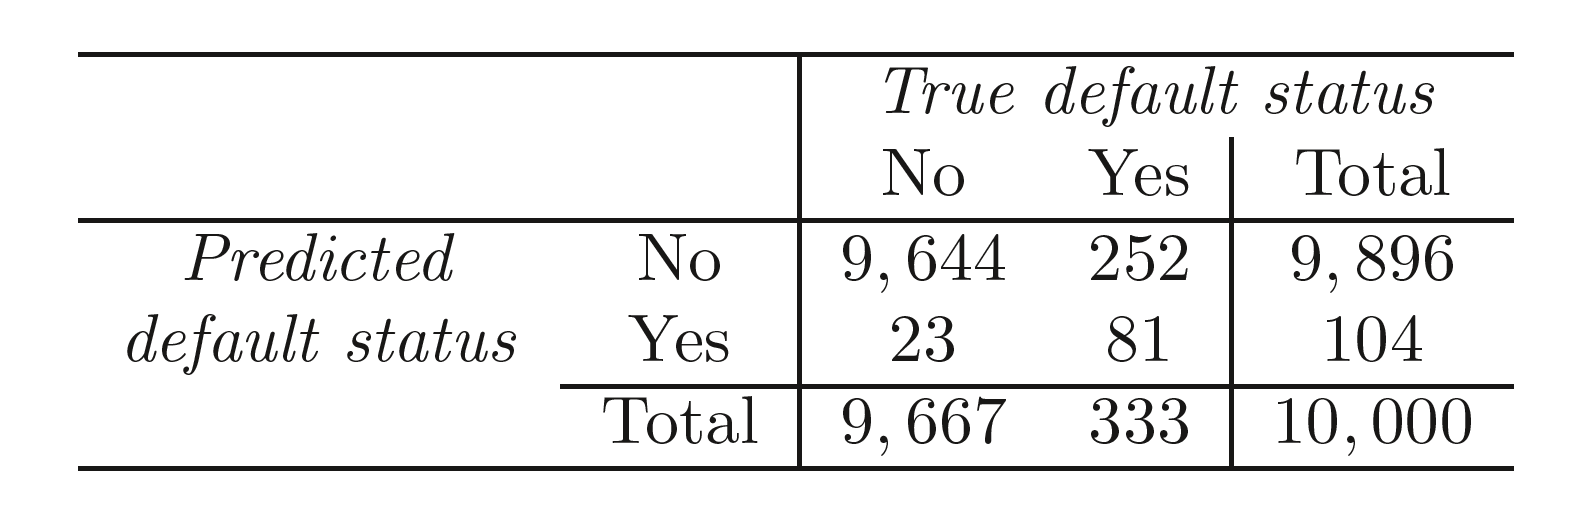

In [52]:
Image('images/p4.png', width =400)

##### Confusion matrix
+ LDA predicted that a total of 104 people would default.
+ 81 actually defaulted and 23 did not.
+ Only 23 out of 9667 of the individuals who did not default were incorrectly labeled
+ However, of the 333 individuals who defaulted, 252 (or 75.7%) were missed by LDA.
+ Even though the overall error rate is low, the error rate among individuals who defaulted is very high.

+ **Sensitivity** is the percentage of true defaulters that are identified (81/333 = 24.3%).
+ **Specificity** is the percentage of non-defaulters that are correctly identified (9644/9667 = 99.8%).
+ LDA have a low sensitivity and high specificity. This is because LDA try to yield the smallest total error.
+ This is because, Bayes classifier assign an observation to the class for which the posterior probability, $p_k(X)$ is greatest.

+ For two class case, an observation is assign to the *default* class if 
$$P(\textrm{default = Yes} \, | \, X=x) >0.5 $$
+ The threshold value (0.5) can be lowered or increased (Set by domain expert). For example, if we set 
$$P(\textrm{default = Yes} \, | \, X=x) >0.2 $$

In [53]:
# the model is good but after intepret it is found that there's defaulter in actual data
# the data is inbalance between actual and training data
# solution
## change the treshold/cut off

In [54]:
# tukar priors 
lda2 = LinearDiscriminantAnalysis(priors=[0.9,0.1])
lda2.fit(X,y)
confusion_matrix(y,lda2.predict(X))

array([[9496,  171],
       [ 156,  177]], dtype=int64)

**priors means**
> Set the model to:
>>- 90% chance an observation is from class 0
>>- 10% chance it’s from class 1

In [55]:
#sensitivity of the new model
(9496+177)/10000

0.9673

In [56]:
#specificity 
9496/9667

0.9823109547946622

In [57]:
lda.priors_

array([0.9667, 0.0333])

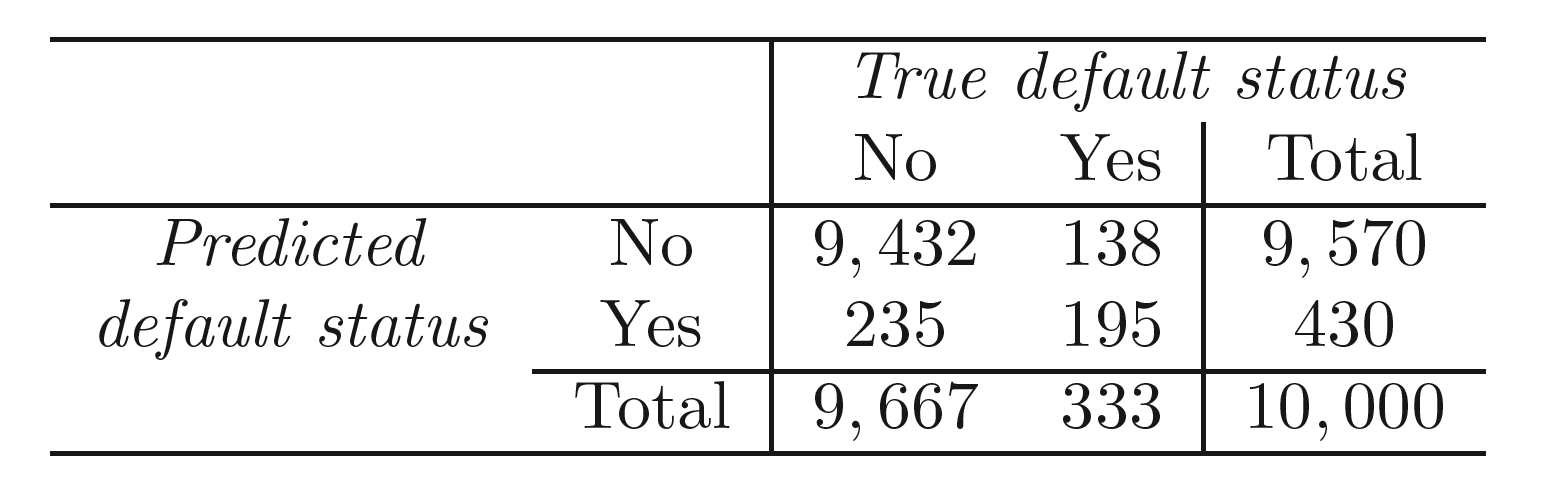

In [58]:
Image('images/p5.png', width =400)

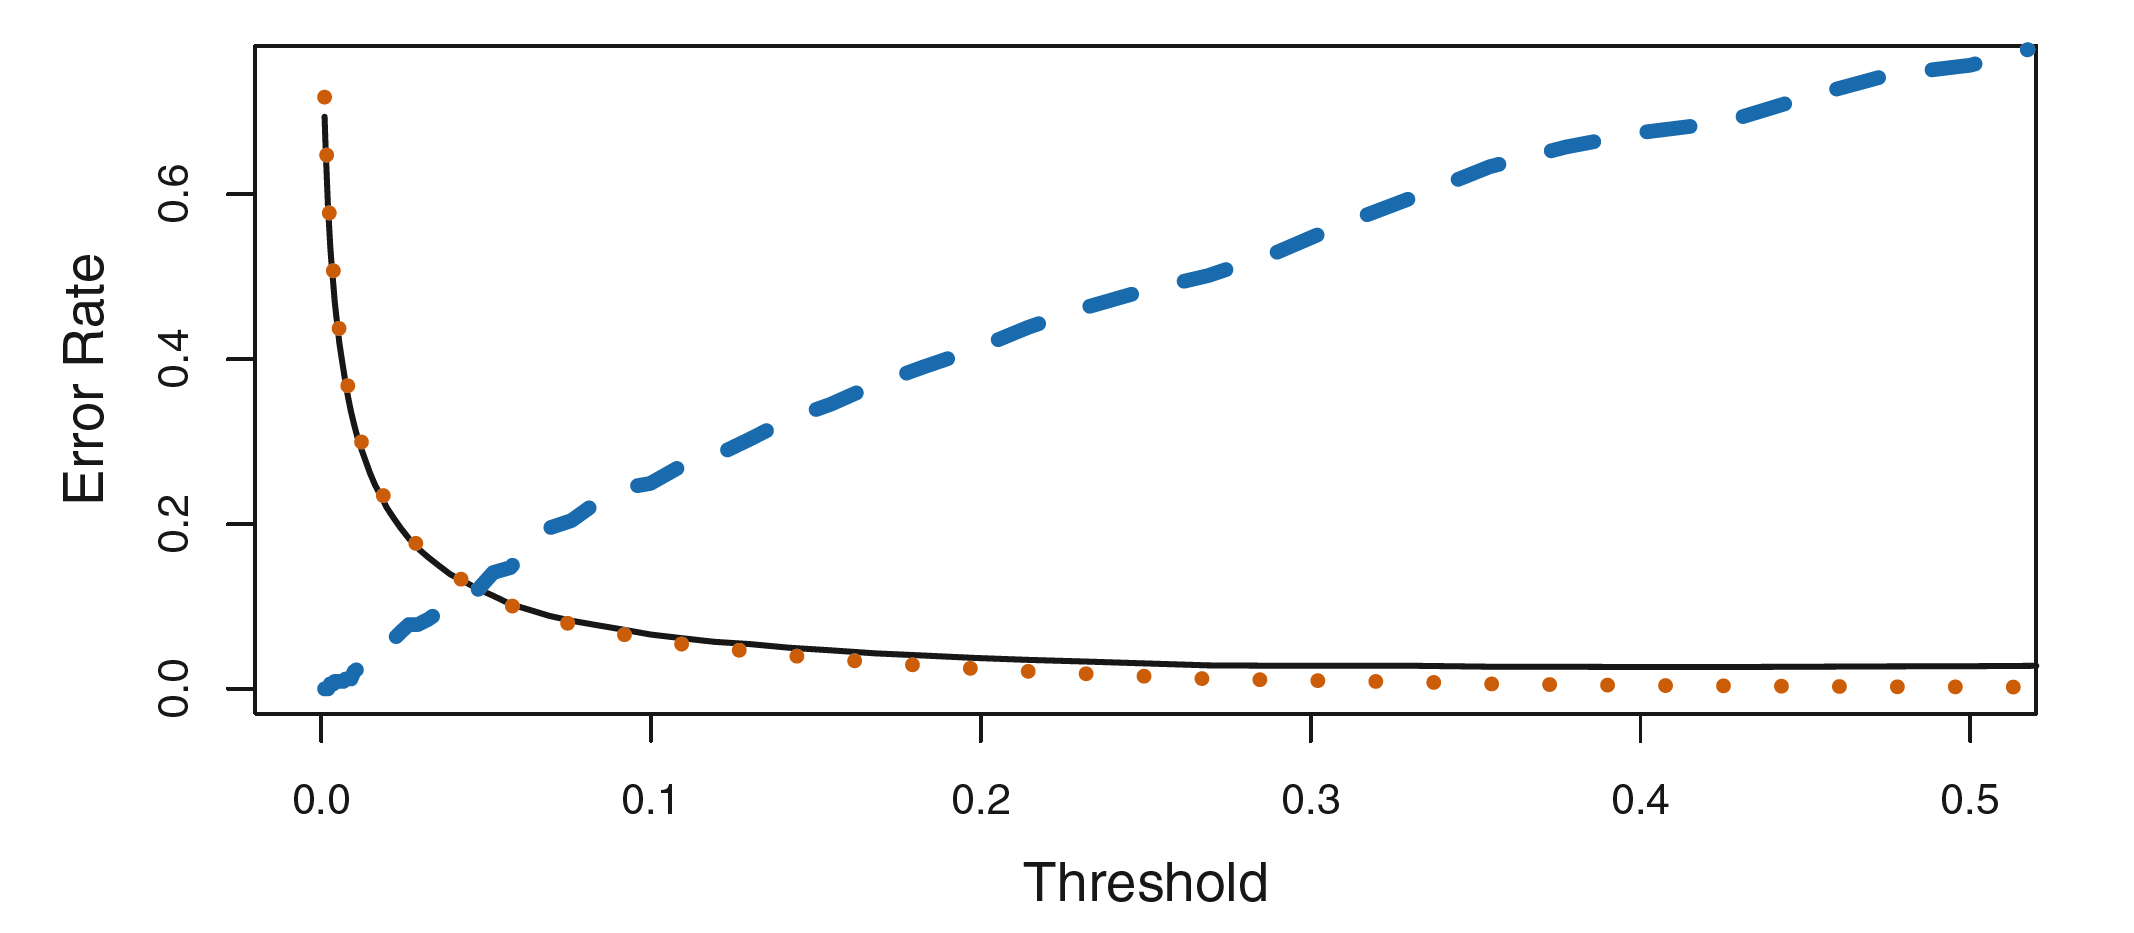

In [59]:
Image('images/p6.png', width =600)          

+ black solid line - overall error rate
+ blue dashed line - the fraction of defaulting customers that are incorrectly classified
+ orange dotted line - the fraction of errors among the non-defaulting customers.

In [60]:
lr.fit(X,y)

LogisticRegression()

In [61]:
confusion_matrix(y,lr.predict(X))

array([[9628,   39],
       [ 228,  105]], dtype=int64)

#### ROC curve
+ simultaneously display the two types of errors for all possible thresholds.
+ The overall performance of a classifier, summarized over all possible thresholds, is given by the area under the (ROC) curve (AUC).
+ The larger the AUC the better the classifier.
+ True positive rate = sensitivity
+ False positive rate = (1 - specifictity)

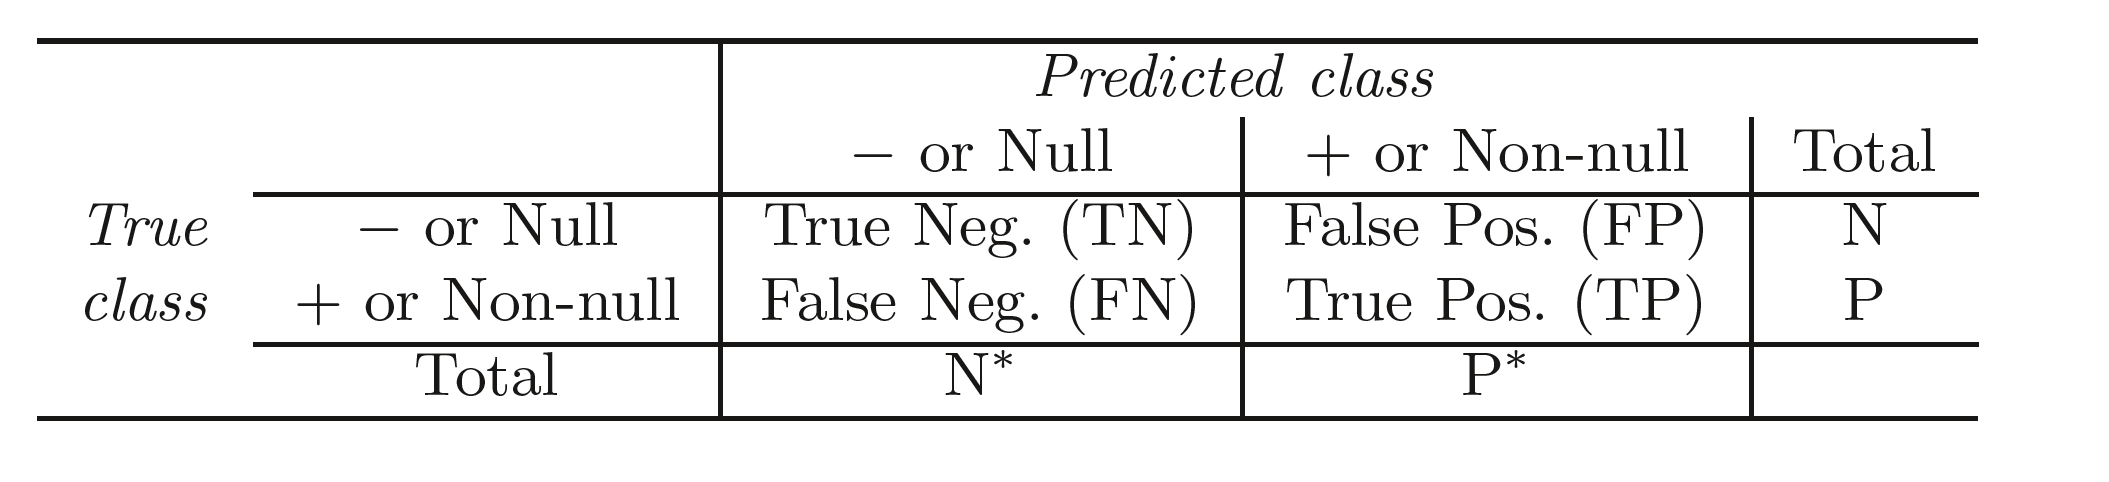

In [62]:
Image('images/p8.png', width =600)

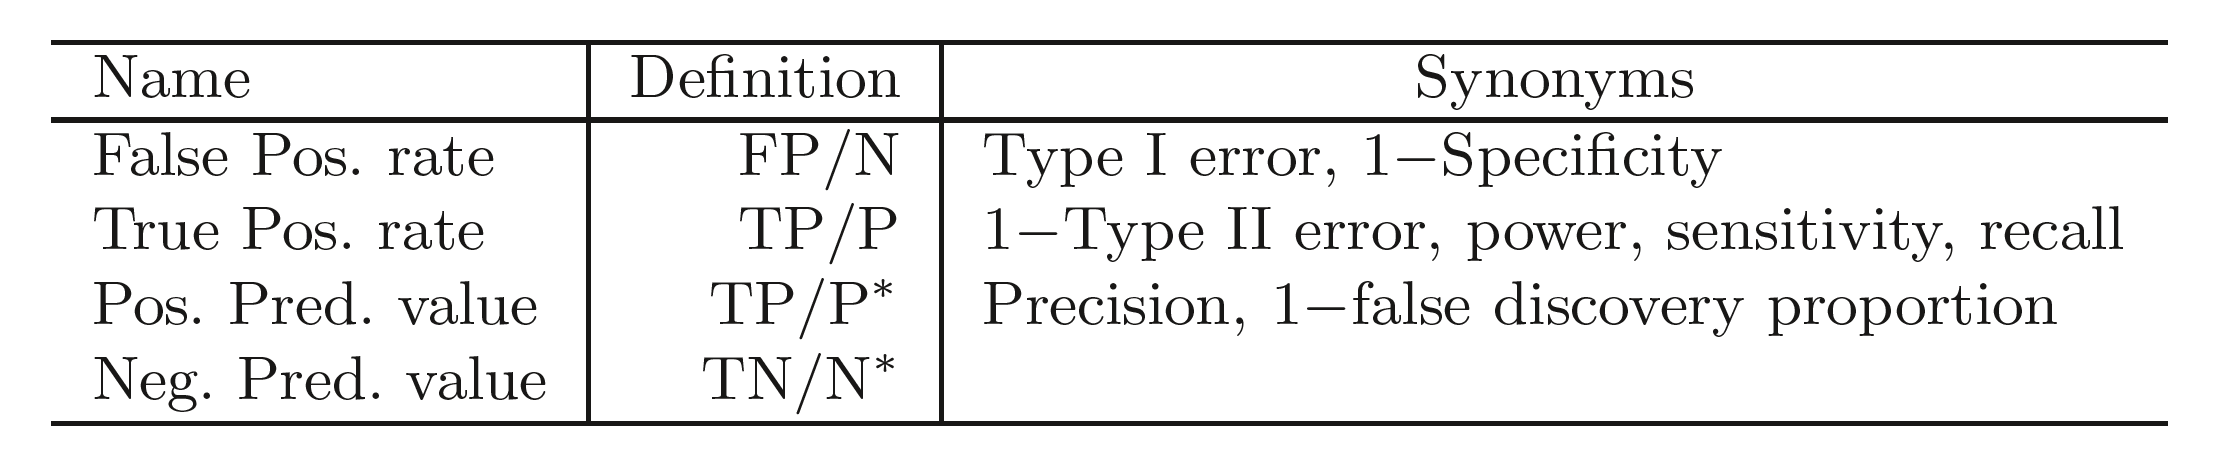

In [63]:
Image('images/p9.png', width =600)

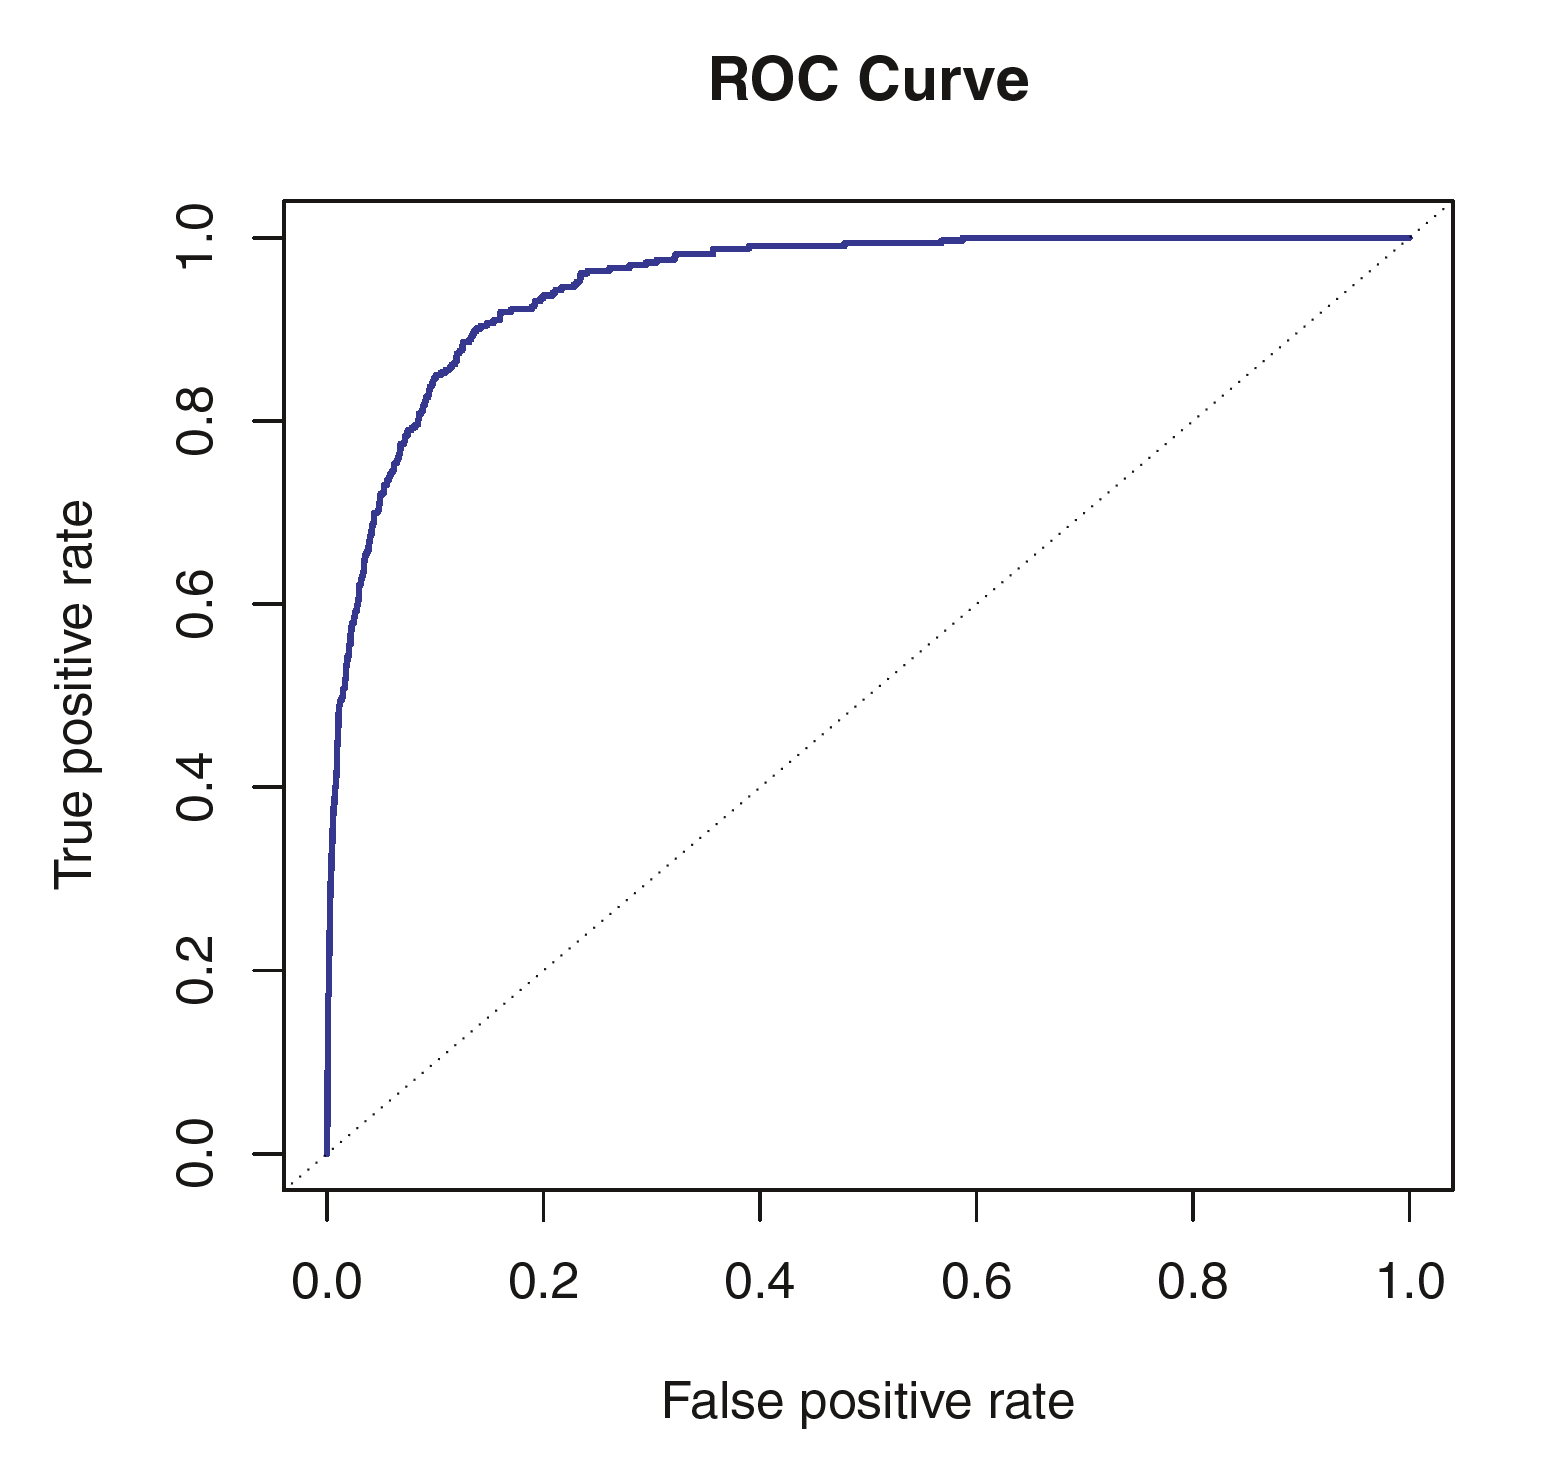

In [64]:
Image('images/p7.png', width =400)

### QDA
+ Same as LDA, QDA assumes the observations from each class are drawn from a Gaussian distribution.
+ However, QDA assumes that each class has its own covariance matrix.
$$\begin{aligned}
\delta_k(x) &= -\frac{1}{2} (x-\mu_k)^T \mathbf{\Sigma}_k^{-1} (x-\mu_k) - \frac{1}{2} \log| \mathbf{\Sigma}_k| + \log{\pi_k} \\
&= -\frac{1}{2} x^T \mathbf{\Sigma}_k^{-1} x +  x^T \mathbf{\Sigma}_k^{-1} \mu_k - \frac{1}{2} \mu_k^T \mathbf{\Sigma}_k^{-1} \mu_k - \frac{1}{2} \log| \mathbf{\Sigma}_k| + \log{\pi_k} 
\end{aligned}$$
+ LDA is a much less flexible (lower variance) classifier than QDA


In [65]:
#QDA is for more flexible data

#### Example
+ The Bayes (purple dashed), LDA (black dotted), and QDA (green solid) 
+ Left: Equal covariances
+ Right: Not equal covariances

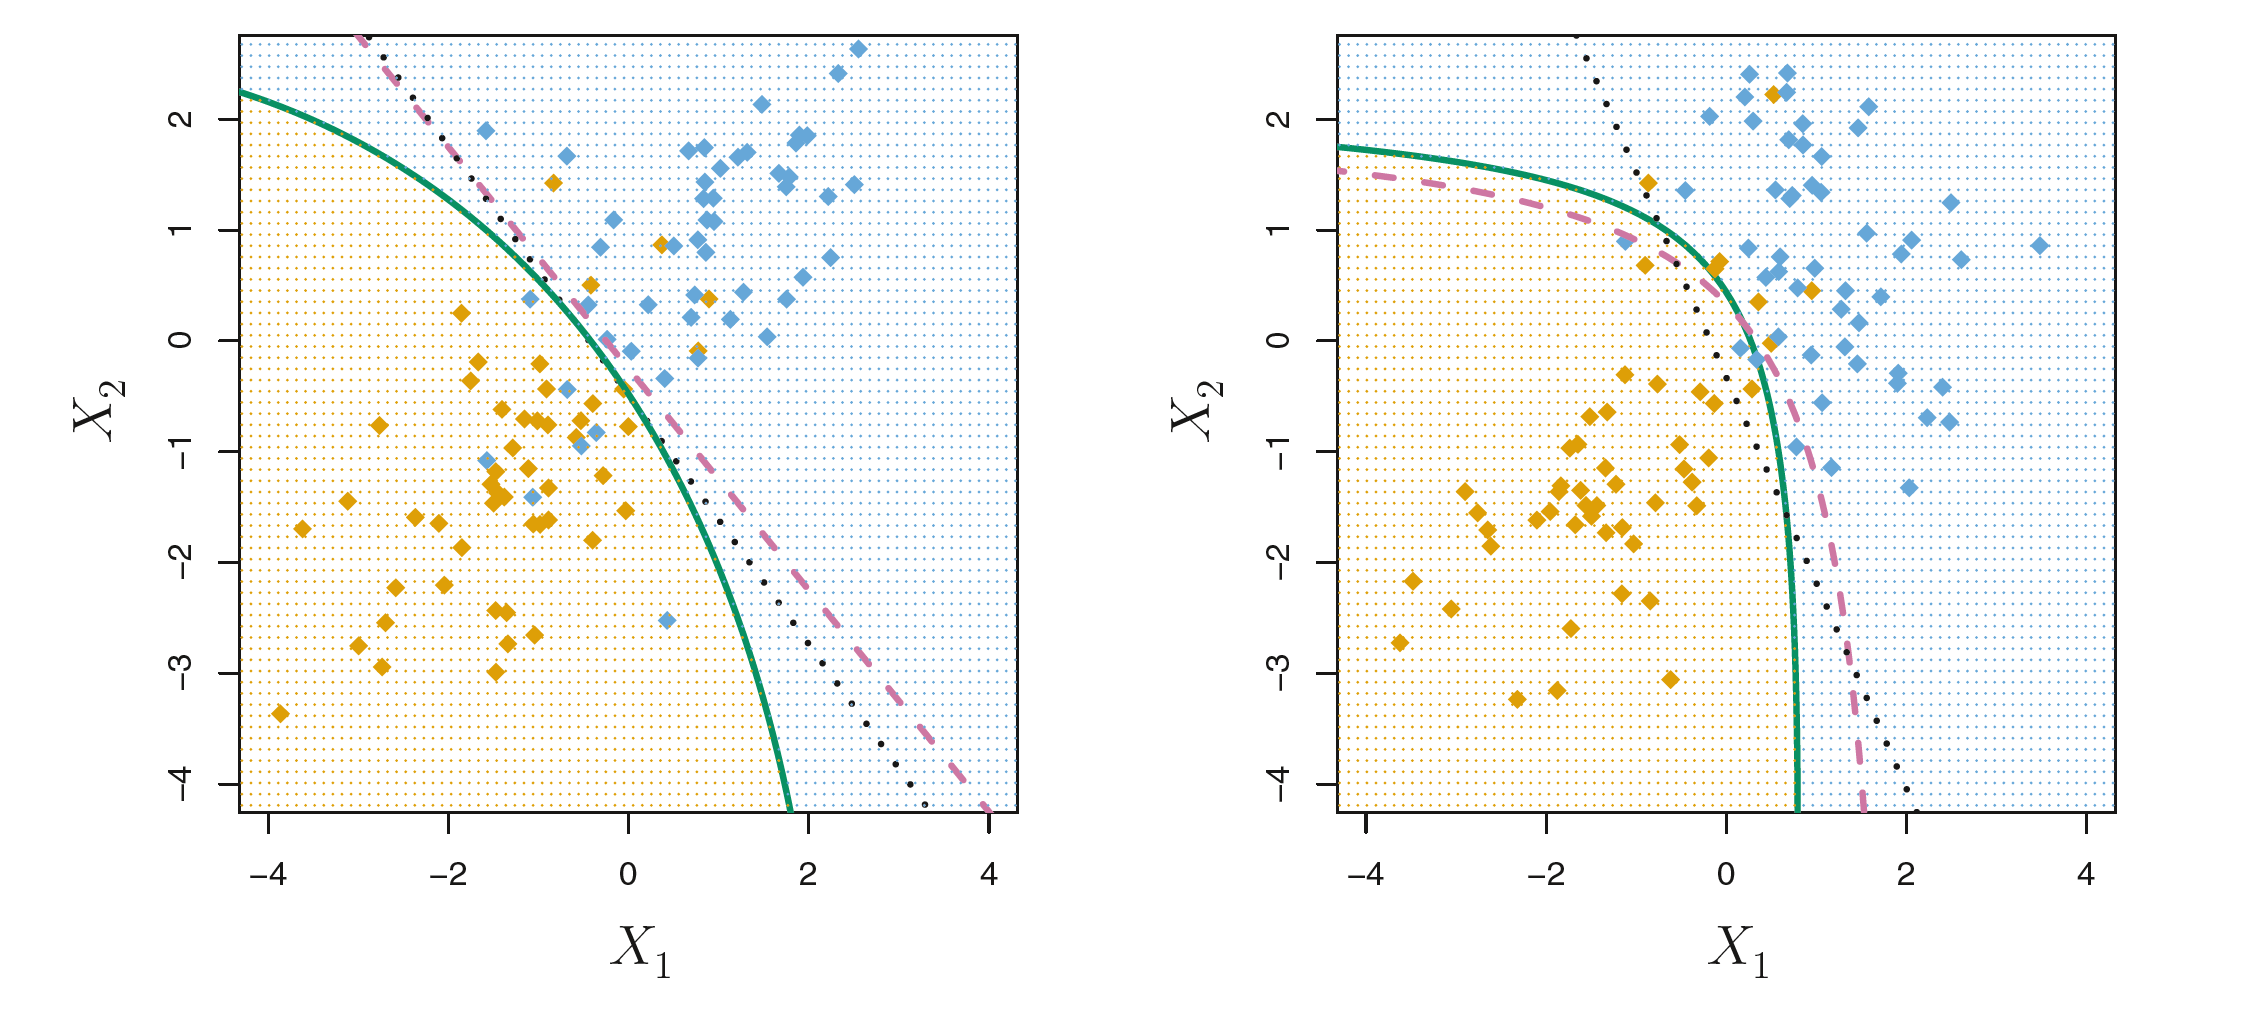

In [66]:
Image('images/p10.png', width =700)

- if you data can be divided by linear line so use LDA
- If base boundary is not linear use QDA 

# Stock market predicition lab
This data set consists of:
+ percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. 
+ For each date, we have recorded the percentage returns for each of the five previous trading days, Lag1 through Lag5. 
+ We have also recorded :
    + Volume (the number of shares traded on the previous day, in billions), 
    + Today (the percentage return on the date in question) 
    + Direction (whether the market was Up or Down on this date).

In [214]:
smarket = pd.read_csv('data/smarket.csv')
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [215]:
smarket['Up'] = np.where(smarket['Direction'] == 'Up', 1, 0)

In [70]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Up
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [71]:
smarket.drop(columns='Direction').corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Up
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Up,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


In [216]:
X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values
y = smarket['Up'].values

In [217]:
train_bool = smarket['Year'].values < 2005
X_train = X[train_bool]
X_test = X[~train_bool]
y_train = y[train_bool]
y_test = y[~train_bool]

In [140]:
y_train

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [139]:
X_test

array([[-0.134,  0.008, -0.007,  0.715, -0.431],
       [-0.812, -0.134,  0.008, -0.007,  0.715],
       [-1.167, -0.812, -0.134,  0.008, -0.007],
       ...,
       [-0.955,  0.043,  0.422,  0.252, -0.024],
       [ 0.13 , -0.955,  0.043,  0.422,  0.252],
       [-0.298,  0.13 , -0.955,  0.043,  0.422]])

In [75]:
results = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data=smarket).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691327
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Sun, 25 May 2025   Pseudo R-squ.:                0.001651
Time:                        16:51:33   Log-Likelihood:                -864.16
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

This logistic regression doesn't find any strong evidence that the past 5 days' returns help predict whether the market will go up today. The model doesn't perform better than random guessing.

In [76]:
from sklearn.metrics import confusion_matrix

In [218]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [143]:
# true on the left axis, predicted above
confusion_matrix(y_test, lr.predict(X_test))

array([[ 37,  74],
       [ 30, 111]], dtype=int64)

In [79]:
148/ len(y_test)

0.5873015873015873

Out of the 67 predicted down, 37 actually were down days. 54% accurracy  
Out of the 185 predicted up, 111 actually were up. 60% accuracy.  
58% total accuracy

In [219]:
y_pred = lr.predict(X_test)

In [146]:
y_pred[y_test == 1]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

predicted up market in x_test that contain -> up market from y_test

In [222]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('Logistic Regression')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Logistic Regression
Confusion Matrix:
 [[ 37  74]
 [ 30 111]]
Accuracy: 0.5873015873015873
Precision: 0.6
Recall: 0.7872340425531915
F1 Score: 0.6809815950920246


In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [226]:
lda = LinearDiscriminantAnalysis()

In [227]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [233]:
y_pred= lda.predict(X_test)

In [228]:
#almost exact same as logistic regression
confusion_matrix(y_test, lda.predict(X_test))

array([[ 37,  74],
       [ 30, 111]], dtype=int64)

In [86]:
lda.priors_

array([0.49198397, 0.50801603])

In [234]:
print('Linear Discrimination Analysis')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Linear Discrimination Analysis
Confusion Matrix:
 [[ 37  74]
 [ 30 111]]
Accuracy: 0.5873015873015873
Precision: 0.6
Recall: 0.7872340425531915
F1 Score: 0.6809815950920246


In [230]:
# use QDA with only 2 variables
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[:,:2], y_train)

QuadraticDiscriminantAnalysis()

In [235]:
y_pred= qda.predict(X_test[:,:2])

In [236]:
#almost exact same as logistic regression
confusion_matrix(y_test, qda.predict(X_test[:,:2]))

array([[ 30,  81],
       [ 20, 121]], dtype=int64)

In [237]:
print('Quadratic Discrimination Analysis')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Quadratic Discrimination Analysis
Confusion Matrix:
 [[ 30  81]
 [ 20 121]]
Accuracy: 0.5992063492063492
Precision: 0.599009900990099
Recall: 0.8581560283687943
F1 Score: 0.7055393586005831


In [149]:
y_test

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [89]:
151/len(y_test)

0.5992063492063492

In [151]:
# knn
from sklearn.neighbors import KNeighborsClassifier

In [238]:
knn = KNeighborsClassifier(n_neighbors=3)

The model will look at the 3 closest points (neighbors) in the training data to decide how to classify a new point.
If you're trying to predict whether tomorrow's market goes Up or Down, and the 3 nearest past examples are:
- Up
- Up
- Down

Then the model will predict "Up" (because 2 out of 3 neighbors were "Up").
This is the core idea behind K-Nearest Neighbors (KNN). It makes decisions based on the majority class among the nearest neighbors.

In [239]:
knn.fit(X_train[:,:], y_train)

KNeighborsClassifier(n_neighbors=3)

In [240]:
y_pred= knn.predict(X_test)

In [154]:
confusion_matrix(y_test, knn.predict(X_test[:,:]))

array([[46, 65],
       [62, 79]], dtype=int64)

In [241]:
print('KNN')
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

KNN
Confusion Matrix: [[46 65]
 [62 79]]
Accuracy: 0.49603174603174605
Precision: 0.5486111111111112
Recall: 0.5602836879432624
F1 score: 0.5543859649122808


# Exercises

# 1
Turn equation 4.2 to 4.3

4.2
$$p(x) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

4.3
$$\frac{p(x)}{1 - p(x)} = e^{\beta_0 + \beta_1X}$$

First, multiply 4.2 by negative 1 and add 1 to both sides
$$1 - p(x) = 1 - \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$
Simplify right hand side
$$1 - p(x) = \frac{1}{1 + e^{\beta_0 + \beta_1X}}$$
Now just divide 4.2 by the last equation and you have the result

# 2 
Prove that 4.13 maximizes 4.12.

Since log is a monotone increasing function, maximizing the log of a function will also maximize the original function. After taking the log of 4.12 all constants can be dropped and you are left with the 4.13.

# 3
Prove that QDA is quadratic with one predictor

This is show by taking the log of 4.12 and throwing away all terms that don't depend on k. An extra term will be left attached to $x^2$ thus making it quadratic. This term disappears in LDA because all the variances are the same.

# 4
It's easiest to think in terms of each X in a range of 0 - 100
a) 10 / 100 = 10%  
b) 10 x 10 / (100 x 100) = 1%  
c) $10^{-100}$. The fraction of nearest neighbors is $10^{-p}$  
d) even in 2 dimensions only 1% of neighbors will be within 5% on either side  
e) 10% for p=1.
Generalizing we get $.1^{1/p}$

# 5
a) QDA on training. LDA on test  
b) QDA on both  
c) Since QDA is a quadratic model, more data should improve the model faster than LDA  
d) False, QDA will overfit by finding a different variance for each class when in reality the variance for each class are the same

# 6

In [94]:
# a
b0 = -6
b1 = .05
b2 = 1
x1 = 40
x2 = 3.5
t = -6 + b1 * x1 + b2 * x2
print("student has a {:.3f} probability of getting an A".format(1 / (1 + np.exp(-t))))

#b. solve for t = 0. Since an odds of 1 corresponds to 50/50 chance and log(1) = 0
# 0 = -6 + b1 * x1 + b2 * x2
hours = (6 - b2 * x2) / b1
print("student needs to study {} hours to have a 50% chance at an A".format(1 / (1 + np.exp(-t))))

student has a 0.378 probability of getting an A
student needs to study 0.3775406687981454 hours to have a 50% chance at an A


In [95]:
# double check 50%
b0 = -6
b1 = .05
b2 = 1
x1 = 50
x2 = 3.5
t = -6 + b1 * x1 + b2 * x2
1 / (1 + np.exp(-t))

0.5

# 7

In [96]:
# 7
prior = .8
mu_d = 10
mu_no_d = 0
sigma = 6
normal = lambda x, m, s: 1 / np.sqrt(2 * np.pi * s ** 2) * np.exp(-(x - m) ** 2 / (2 * s ** 2))

In [97]:
f_d = normal(4, 10, 6)
f_no_d = normal(4, 0, 6)
f_d, f_no_d

(0.0403284540865239, 0.053241334253725375)

In [98]:
# bayes
prob_div = prior * f_d / (prior * f_d + (1 - prior) * f_no_d)
print("Probability of dividend is {:.3f}".format(prob_div))

Probability of dividend is 0.752


# 8
Since knn with k equal to 1 always picks itself, its training error is 0. Meaning in the given example the test error is .36 and worse than logistic regression.

# 9

In [99]:
# a
# p / (1 - p) = .37
# 1 / p - 1 = 1 / .37
odds = .37
one_over_p = 1 + 1 / odds
p = 1 / one_over_p
print("The probability of defaulting with odds of {} are {:.2f}".format(odds, p))
print("The odds of defaulting with probability .16 are {:.2f}".format(.16 / .84))

The probability of defaulting with odds of 0.37 are 0.27
The odds of defaulting with probability .16 are 0.19


# 10

In [100]:
weekly = pd.read_csv("data/weekly.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [101]:
# strongest correlations with today are lag1 and lag3
weekly.drop(columns="Direction").corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [102]:
today = weekly['Today']

In [103]:
today_perc = (100 + today) / 100

<Axes: >

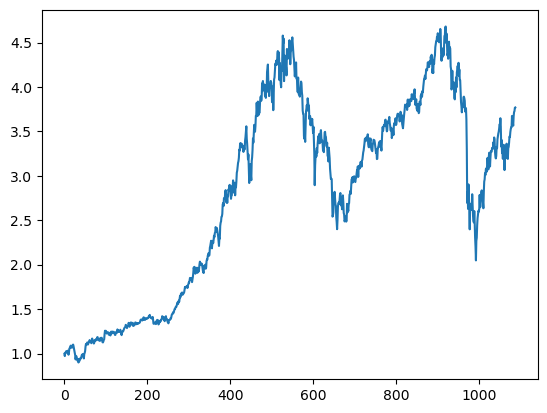

In [104]:
today_perc.cumprod().plot()

<Axes: >

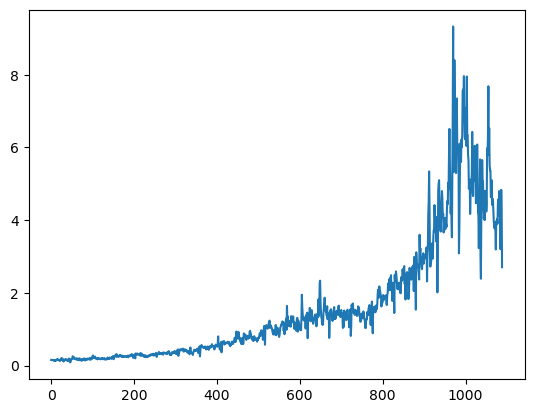

In [105]:
weekly['Volume'].plot()

<Axes: xlabel='Direction', ylabel='Lag1'>

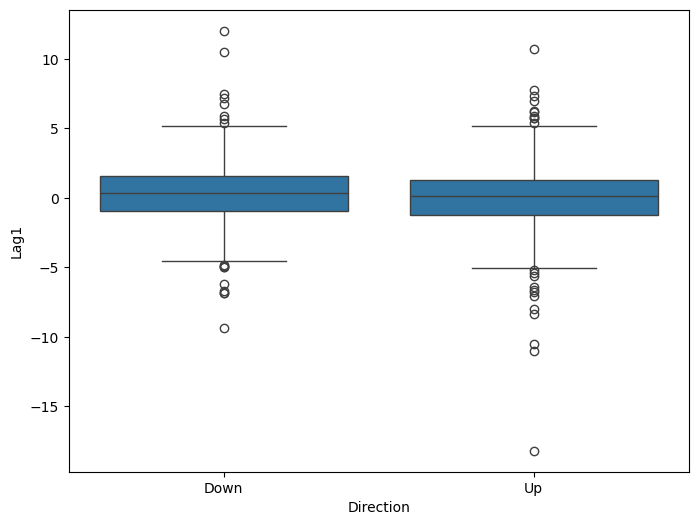

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Direction', y='Lag1', data=weekly)

<Axes: xlabel='Direction', ylabel='Lag3'>

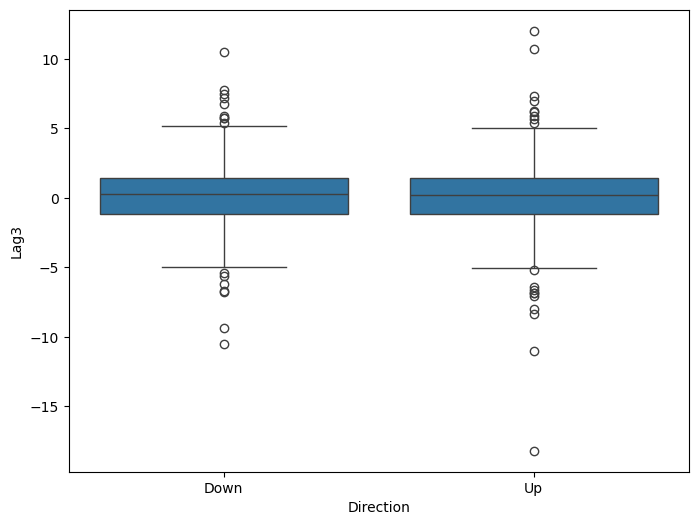

In [107]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Direction', y='Lag3', data=weekly)

In [108]:
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

In [109]:
# wow lag2 is statistically significant
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 May 2025   Pseudo R-squ.:                0.006580
Time:                        16:51:39   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [110]:
# wow lag2 is statistically significant
results = smf.logit('Direction ~ Lag2', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 May 2025   Pseudo R-squ.:                0.003866
Time:                        16:51:39   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01617
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.026      2.382      0.017       0.011       0.114
==============================================================================
"""

In [111]:
predictions = np.where(results.predict(weekly) > .5, 1, 0)

In [112]:
confusion_matrix(weekly['Direction'], predictions)

array([[ 33, 451],
       [ 26, 579]], dtype=int64)

In [113]:
451 / 1030 

0.43786407766990293

In [114]:
weekly['Direction'].mean()

0.5555555555555556

The default prediciton is Up - about 95% of the predictions are up and it actually gets 56.2% correct but that's only slightly higher than the 55.6% total up days.

In [115]:
# use sklearn for rest of problems
year_bool = weekly['Year'] < 2009
weekly['ones'] = 1
X_train = weekly[year_bool][['ones', 'Lag2']].values
X_test = weekly[~year_bool][['ones', 'Lag2']].values
y_train = weekly[year_bool]['Direction'].values
y_test = weekly[~year_bool]['Direction'].values

In [116]:
lr =  LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [117]:
# not bad
confusion_matrix(y_test, lr.predict(X_test))

array([[ 9, 34],
       [ 5, 56]], dtype=int64)

In [118]:
# e
# use LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
confusion_matrix(y_test, lda.predict(X_test))

array([[ 9, 34],
       [ 5, 56]], dtype=int64)

In [119]:
# terrible
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([[43,  0],
       [61,  0]], dtype=int64)

In [120]:
# very poor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[22, 21],
       [31, 30]], dtype=int64)

In [121]:
# h
# logistic regression and LDA work the best

In [122]:
# i
# not bad when predicting up
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[20, 23],
       [20, 41]], dtype=int64)

In [123]:
# try many combinations
results = smf.logit('Direction ~ np.power(Lag5, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686956
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 May 2025   Pseudo R-squ.:               8.318e-06
Time:                        16:51:39   Log-Likelihood:                -748.09
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9112
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2256      0.065      3.475      0.001       0.098       0.353
np.power(Lag5, 2)    -0.0004      0.004     -0.112      0.911      -0.008       0.007
=====================================================================================
"""

In [124]:
# try many combinations
results = smf.logit('Direction ~ np.power(Volume, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686884
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 May 2025   Pseudo R-squ.:               0.0001136
Time:                        16:51:39   Log-Likelihood:                -748.02
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.6801
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2359      0.068      3.448      0.001       0.102       0.370
np.power(Volume, 2)    -0.0024      0.006     -0.413      0.680      -0.014       0.009
=======================================================================================
"""

In [125]:
# try many combinations
results = smf.logit('Direction ~ Volume * Lag3', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686505
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 May 2025   Pseudo R-squ.:               0.0006650
Time:                        16:51:39   Log-Likelihood:                -747.60
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.8025
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2631      0.084      3.134      0.002       0.099       0.428
Volume         -0.0235      0.036     -0.649      0.516      -0.095       0.048
Lag3           -0.0188      0.039     -0.482      0.630      -0.095       0.058
Volume:Lag3    -0.0007      0.011     -0.067      0.946      -0.022       0.020
===============================================================================
"""

# 12

In [126]:
# a
auto = pd.read_csv('data/auto.csv')

In [127]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)

In [128]:
auto.corr()

ValueError: could not convert string to float: 'chevrolet chevelle malibu'

In [ ]:
X = auto[['cylinders', 'origin']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

In [ ]:
X = auto[['cylinders', 'origin', 'year', 'acceleration']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# slightly higher with more variables
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

In [ ]:
X = auto[auto.columns[1:-1] - ['name']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Quite a bit better with all variables and high regularlization
lr = LogisticRegression(C=.01)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

In [ ]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

In [ ]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

In [ ]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# looks like 18-32 for K yields the best results
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    print('With K={} accuracy is {:.3f}'.format(k, accuracy))

# 12

In [ ]:
power = lambda x, a: x ** a

In [ ]:
power(3, 8)

In [ ]:
n = 100
plt.plot(range(n), [power(x, 2) for x in range(n)])

In [ ]:
def plot_power(rng, p):
    plt.plot(rng, [power(x, p) for x in rng])

In [ ]:
plot_power(range(3,14), 3)

# 13

In [ ]:
boston = pd.read_csv('data/boston.csv')
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)
boston.head()

In [ ]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

In [ ]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

In [ ]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))